In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df= pd.read_csv("/content/SMSSpamCollection.txt",sep="\t",names=["label","message"])

In [ ]:
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import  LabelEncoder
encoder= LabelEncoder()

In [ ]:
df['label']=encoder.fit_transform(df['label'])

In [ ]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first', inplace= True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.label.value_counts()

0    4516
1     653
Name: label, dtype: int64

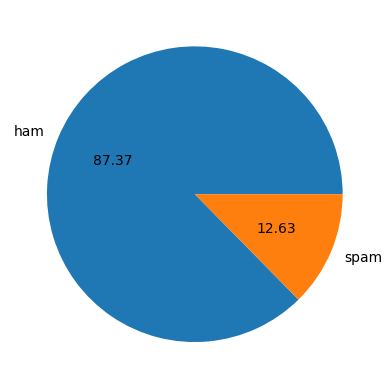

In [ ]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

From the above plot, we can say that the data is imbalanced.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["characters_count"]=df['message'].apply(len)

In [ ]:
df["words_count"]=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head(5)

,label,message,characters_count,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['sentences_count']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(5)

,label,message,characters_count,words_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='characters_count', ylabel='Count'>

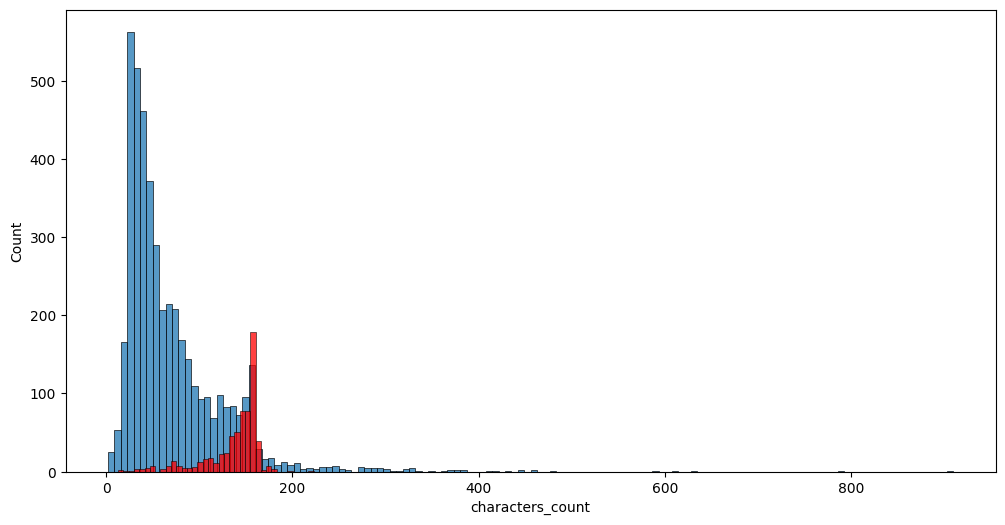

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['characters_count'])
sns.histplot(df[df['label']==1]['characters_count'], color='red')

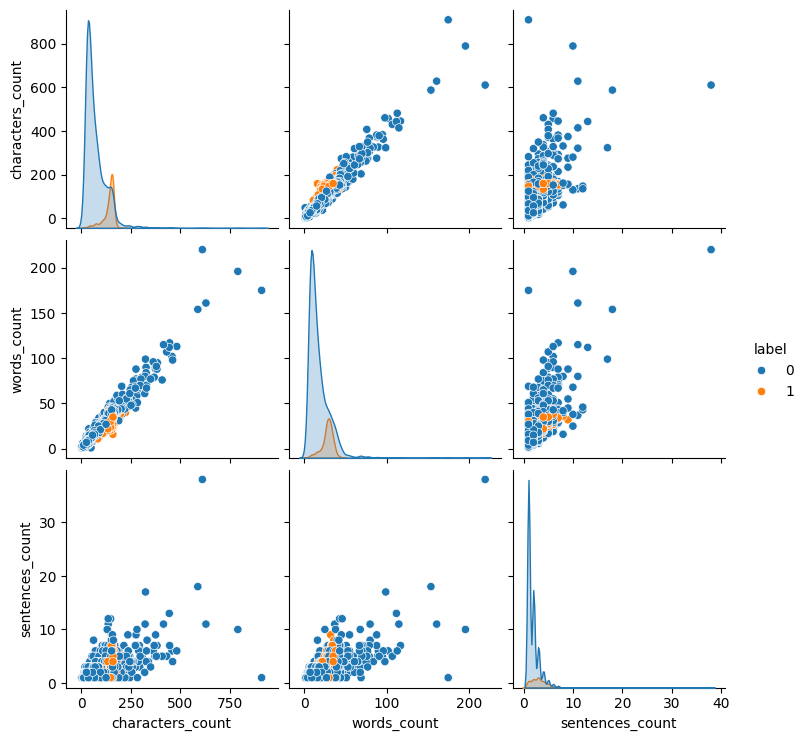

In [ ]:
sns.pairplot(df,hue='label')

<ipython-input-24-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

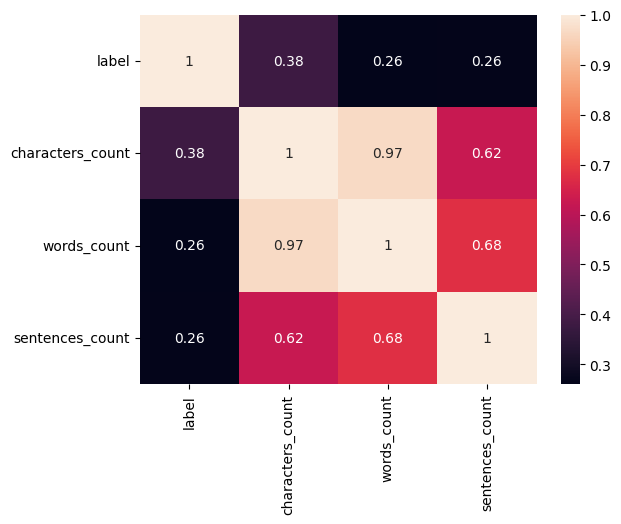

In [ ]:
sns.heatmap(df.corr(), annot=True)

Text Prepocessing

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def text_preprocessing(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
df['preprocessed_text']=df['message'].apply(text_preprocessing)

In [ ]:
df.head()

,label,message,characters_count,words_count,sentences_count,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spamwc=wc.generate(df[df["label"]==1]['preprocessed_text'].str.cat(sep=" "))

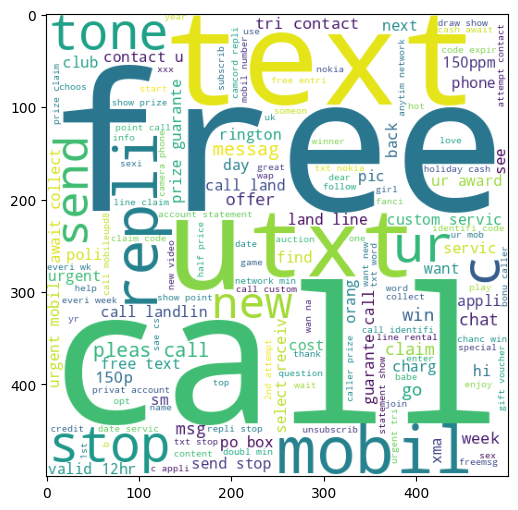

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spamwc)

In [ ]:
hamwc=wc.generate(df[df["label"]==0]["preprocessed_text"].str.cat(sep=" "))

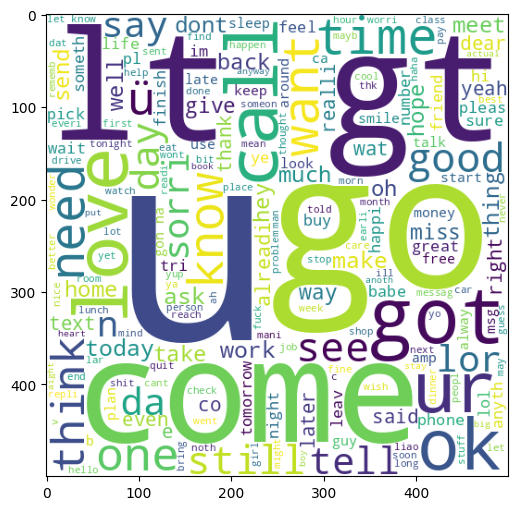

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(hamwc)

In [ ]:
spam_corpus=[]
for msg in df[df["label"]==1]["preprocessed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
len(spam_corpus)

9982

In [ ]:
ham_corpus=[]
for msg in df[df["label"]==0]["preprocessed_text"]:
  for word in msg.split():
    ham_corpus.append(word)


In [ ]:
len(ham_corpus)

35939

4. Model Building

In [168]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [169]:
X=tfidf.fit_transform(df["preprocessed_text"]).toarray()

In [147]:
X[5]

array([0., 0., 0., ..., 0., 0., 0.])

In [170]:
X.shape

(5169, 3000)

In [171]:
y=df['label'].values

In [172]:
from sklearn.model_selection import train_test_split


In [173]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [174]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [175]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [176]:
gnb.fit(X_train, y_train)
y_predict1=gnb.predict(X_test)
print(accuracy_score(y_test, y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))


0.8704061895551257
[[781 113]
 [ 21 119]]
0.5129310344827587


In [177]:
mnb.fit(X_train,y_train)
y_predict2= mnb.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(confusion_matrix(y_test, y_predict2))
print(precision_score(y_test, y_predict2))

0.9738878143133463
[[894   0]
 [ 27 113]]
1.0


In [178]:
bnb.fit(X_train, y_train)
y_predict3= bnb.predict(X_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test, y_predict3))

0.9874274661508704
[[894   0]
 [ 13 127]]
1.0


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [180]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=42)
xgb = XGBClassifier(n_estimators=50,random_state=42)

In [159]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [160]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_predict=clf.predict(X_test)
  accuracy=accuracy_score(y_test, y_predict)
  precision= precision_score(y_test,y_predict)
  return accuracy, precision

In [181]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9748549323017408, 0.9596774193548387)

In [182]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy, current_precision=train_classifier(clf, X_train, y_train, X_test, y_test)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  print("For ",name)
  print("Accuracy: ", current_accuracy)
  print("Precision: ", current_precision)



For  SVC
Accuracy:  0.9748549323017408
Precision:  0.9596774193548387
For  KN
Accuracy:  0.9110251450676983
Precision:  1.0
For  NB
Accuracy:  0.9738878143133463
Precision:  1.0
For  DT
Accuracy:  0.937137330754352
Precision:  0.8378378378378378
For  LR
Accuracy:  0.9516441005802708
Precision:  0.9245283018867925
For  RF
Accuracy:  0.9777562862669246
Precision:  1.0
For  AdaBoost
Accuracy:  0.9622823984526112
Precision:  0.9243697478991597
For  BgC
Accuracy:  0.965183752417795
Precision:  0.8939393939393939
For  ETC
Accuracy:  0.9796905222437138
Precision:  0.983739837398374
For  GBDT
Accuracy:  0.9526112185686654
Precision:  0.9690721649484536
For  xgb
Accuracy:  0.9709864603481625
Precision:  0.9824561403508771


In [163]:
print(clfs.keys())


dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb'])


In [164]:
performance_df=pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [165]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.970986,1.000000
1,KN,0.910058,1.000000
2,NB,0.959381,1.000000
3,DT,0.938104,0.829787
4,LR,0.945841,0.926829
5,RF,0.966151,0.989247
6,AdaBoost,0.958414,0.910891
7,BgC,0.962282,0.884956
8,ETC,0.970986,0.980000
9,GBDT,0.947776,0.928571


In [166]:
performance_df.sort_values(by=["Precision"], ascending =False)

,Algorithm,Accuracy,Precision
0,SVC,0.970986,1.000000
1,KN,0.910058,1.000000
2,NB,0.959381,1.000000
5,RF,0.966151,0.989247
8,ETC,0.970986,0.980000
10,xgb,0.968085,0.979381
9,GBDT,0.947776,0.928571
4,LR,0.945841,0.926829
6,AdaBoost,0.958414,0.910891
7,BgC,0.962282,0.884956


In [114]:
performance_df1=pd.melt(performance_df, id_vars="Algorithm")


In [115]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.970986
1,KN,Accuracy,0.910058
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.938104
4,LR,Accuracy,0.945841
5,RF,Accuracy,0.966151
6,AdaBoost,Accuracy,0.958414
7,BgC,Accuracy,0.962282
8,ETC,Accuracy,0.970986
9,GBDT,Accuracy,0.947776


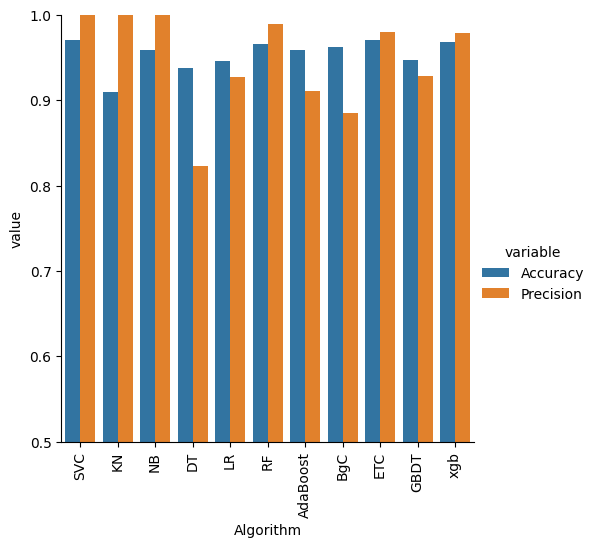

In [167]:
sns.catplot(x='Algorithm', y='value', hue='variable',data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

* Model Improvization

** Changing the maximum features to 3000 for best results

In [184]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [185]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [186]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.970986,1.000000,0.974855,0.959677
1,KN,0.910058,1.000000,0.911025,1.000000
2,NB,0.959381,1.000000,0.973888,1.000000
3,DT,0.938104,0.829787,0.937137,0.837838
4,LR,0.945841,0.926829,0.951644,0.924528
5,RF,0.966151,0.989247,0.977756,1.000000
6,AdaBoost,0.958414,0.910891,0.962282,0.924370
7,BgC,0.962282,0.884956,0.965184,0.893939
8,ETC,0.970986,0.980000,0.979691,0.983740
9,GBDT,0.947776,0.928571,0.952611,0.969072


* Voting Classifier


In [187]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)

from sklearn.ensemble import VotingClassifier

In [188]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [189]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42))],
                 voting='soft')

In [190]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9841269841269841


# Checking model performance with stacking.

In [191]:
from sklearn.ensemble import StackingClassifier

In [192]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [193]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [194]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9477611940298507


Though the accuracy is increased to 98.1% but the precision is decreased.


So of all the models, the Naive Bayes model is the best model with accuracy at 97.4% and precision at 100%. In this case, model with very good precision score helps in reducing False positives (an email which is not a spam but predicted as spam).

In [195]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))